# Movie Rating Prediction

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 30,000+ Movies, 60+ years of data. We are to explore this dataset and to figure out if a movie rating can be predicted.

### Business Understanding

From a business perspective, if we can predict a movie's rating based on the provided feature value, it will give the movie producer the guidance of what movies to make and what features they should be paying more attention to etc. As such, the company can potentially generting move revenue for each movie they make.  

### Data Understanding


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# The notebook and data is persisted in my google drive,
# the notebook has a default location by Colab: Colab Notebooks,
# the data is stored in sub directory created by me, it is called: ColabData
# the following code map and mount my google drive to colab subdirectory: data
from google.colab import drive
drive.mount('/content/data', force_remount=True)

Mounted at /content/data


In [ ]:
data = pd.read_csv('data/My Drive/ColabData/final_dataset.csv')
#data = pd.read_csv('data/vehicles.csv')
data.head()

,id,title,year,duration,MPA,rating,votes,meta_score,description,Movie_Link,...,opening_weekend_gross,gross_worldwide,gross_us_canada,release_date,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690K,87.0,When a massive killer shark unleashes chaos on...,https://www.imdb.com/title/tt0073195,...,"$7,061,513","$477,916,625","$267,263,625",1975.0,['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...","Won 3 Oscars, 16 wins & 20 nominations total","['Monster Horror', 'Sea Adventure', 'Survival'...",['English']
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174K,65.0,A newly-engaged couple have a breakdown in an ...,https://www.imdb.com/title/tt0073629,...,NaN,"$115,827,018","$112,892,319",1975.0,"['United Kingdom', 'United States']","[""Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...","Awards, 3 wins & 4 nominations total","['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...",['English']
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,84.0,"In the Fall of 1963, a Korean War veteran and ...",https://www.imdb.com/title/tt0073486,...,NaN,"$109,115,366","$108,981,275",1975.0,['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']","Won 5 Oscars, 38 wins & 15 nominations total","['Medical Drama', 'Psychological Drama', 'Drama']",['English']
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281K,86.0,Three amateur robbers plan to hold up a Brookl...,https://www.imdb.com/title/tt0072890,...,NaN,"$50,004,527","$50,000,000",1975.0,['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']","Won 1 Oscar, 14 wins & 20 nominations total","['Dark Comedy', 'Heist', 'True Crime', 'Biogra...",['English']
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15K,65.0,"On Election Day, 1968, irresponsible hairdress...",https://www.imdb.com/title/tt0073692,...,NaN,"$49,407,734","$49,407,734",1975.0,['United States'],"[""2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...","Won 1 Oscar, 3 wins & 11 nominations total","['Satire', 'Comedy', 'Drama']",['English']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63249 entries, 0 to 63248
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     63249 non-null  object 
 1   title                  63249 non-null  object 
 2   year                   63249 non-null  int64  
 3   duration               61174 non-null  object 
 4   MPA                    41227 non-null  object 
 5   rating                 59181 non-null  float64
 6   votes                  59181 non-null  object 
 7   meta_score             15533 non-null  float64
 8   description            60889 non-null  object 
 9   Movie_Link             63249 non-null  object 
 10  writers                62980 non-null  object 
 11  directors              63198 non-null  object 
 12  stars                  62905 non-null  object 
 13  budget                 15359 non-null  object 
 14  opening_weekend_gross  16837 non-null  object 
 15  gr

In [ ]:
data.describe()

,year,rating,meta_score,release_date
count,63249.000000,59181.000000,15533.000000,54849.000000
mean,1972.686572,6.162731,59.071203,1966.434374
std,30.544579,1.070630,17.403032,27.696231
min,1920.000000,1.000000,1.000000,1920.000000
25%,1946.000000,5.500000,47.000000,1943.000000
50%,1973.000000,6.300000,61.000000,1966.000000
75%,1999.000000,6.900000,72.000000,1989.000000
max,2025.000000,10.000000,100.000000,2024.000000


In [ ]:
# Discover which columns are missing data
data.isna().sum()

,0
id,0
title,0
year,0
duration,2075
MPA,22022
rating,4068
votes,4068
meta_score,47716
description,2360
Movie_Link,0


In [ ]:
# For better interpretation let's convert it into a percentage
data.isna().sum()/data.shape[0]*100

,0
id,0.000000
title,0.000000
year,0.000000
duration,3.280684
MPA,34.817942
rating,6.431722
votes,6.431722
meta_score,75.441509
description,3.731284
Movie_Link,0.000000


In [ ]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['id', 'title', 'duration', 'MPA', 'votes', 'description', 'Movie_Link', 'writers', 'directors', 'stars', 'budget', 'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada', 'countries_origin', 'filming_locations', 'production_companies', 'awards_content', 'genres', 'languages']
Numerical Features: ['year', 'rating', 'meta_score', 'release_date']


In [ ]:
# Get the number of unique values in the categorical features
for feature in categorical_features:
    print(f"Number of Unique Values in {feature}: {data[feature].nunique()}")

Number of Unique Values in id: 63249
Number of Unique Values in title: 58120
Number of Unique Values in duration: 304
Number of Unique Values in MPA: 25
Number of Unique Values in votes: 1769
Number of Unique Values in description: 60836
Number of Unique Values in Movie_Link: 63249
Number of Unique Values in writers: 53985
Number of Unique Values in directors: 21316
Number of Unique Values in stars: 62858
Number of Unique Values in budget: 3146
Number of Unique Values in opening_weekend_gross: 15756
Number of Unique Values in gross_worldwide: 20350
Number of Unique Values in gross_us_canada: 18866
Number of Unique Values in countries_origin: 3461
Number of Unique Values in filming_locations: 21503
Number of Unique Values in production_companies: 35983
Number of Unique Values in awards_content: 3453
Number of Unique Values in genres: 11314
Number of Unique Values in languages: 3255


In [ ]:
# Find number of rows in the dataset
print("Number of Rows in the Dataset:", data.shape[0])

Number of Rows in the Dataset: 63249


### Data Preparation

#### Drop Non-Useful columns

In [ ]:
# Drop both "id","title" coloumn, as they are irelevant to the prediction
# Drop "budget", "opening_weekend_gross", "gross_worldwide", "gross_us_canada", "meta_score" and "awards_content", as there over half values missing

data.drop(['id', 'title', 'budget', 'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada', 'meta_score','awards_content'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63249 entries, 0 to 63248
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  63249 non-null  int64  
 1   duration              61174 non-null  object 
 2   MPA                   41227 non-null  object 
 3   rating                59181 non-null  float64
 4   votes                 59181 non-null  object 
 5   description           60889 non-null  object 
 6   Movie_Link            63249 non-null  object 
 7   writers               62980 non-null  object 
 8   directors             63198 non-null  object 
 9   stars                 62905 non-null  object 
 10  release_date          54849 non-null  float64
 11  countries_origin      63150 non-null  object 
 12  filming_locations     46395 non-null  object 
 13  production_companies  61276 non-null  object 
 14  genres                62462 non-null  object 
 15  languages          

In [ ]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['duration', 'MPA', 'votes', 'description', 'Movie_Link', 'writers', 'directors', 'stars', 'countries_origin', 'filming_locations', 'production_companies', 'genres', 'languages']
Numerical Features: ['year', 'rating', 'release_date']


#### Drop Duplicated Rows

In [ ]:
# Count total number of rows after dropping duplicates
print("Number of Rows in the Dataset before Dropping Duplicates:", data.shape[0])

# Drop the duplicate rows
data.drop_duplicates(inplace=True)

# Count total number of rows after dropping duplicates
print("Number of Rows in the Dataset after Dropping Duplicates:", data.shape[0])

Number of Rows in the Dataset before Dropping Duplicates: 63249
Number of Rows in the Dataset after Dropping Duplicates: 63249


In [ ]:
# Summary statistics after dropping unneeded columns and duplicates
data.describe()

,year,rating,release_date
count,63249.000000,59181.000000,54849.000000
mean,1972.686572,6.162731,1966.434374
std,30.544579,1.070630,27.696231
min,1920.000000,1.000000,1920.000000
25%,1946.000000,5.500000,1943.000000
50%,1973.000000,6.300000,1966.000000
75%,1999.000000,6.900000,1989.000000
max,2025.000000,10.000000,2024.000000


#### Handling Outliers


##### a. Rating

[Text(0.5, 1.0, 'Box Plot of rating in the dataset')]

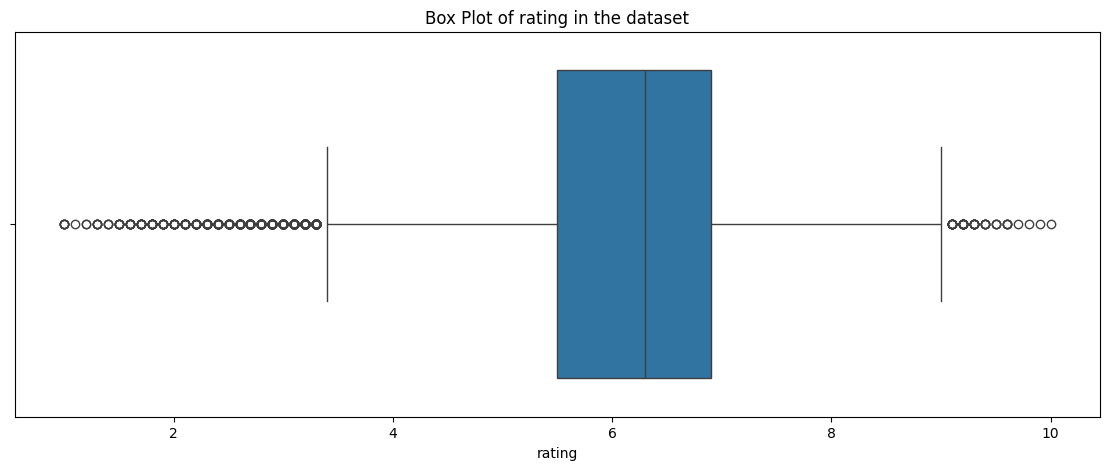

In [ ]:
#box plot of 'rating' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=data,x='rating').set(title="Box Plot of rating in the dataset")

In [ ]:
# there is no outliers for rating


#### Handling missing data

In [ ]:
data.isnull().sum()

,0
year,0
duration,2075
MPA,22022
rating,4068
votes,4068
description,2360
Movie_Link,0
writers,269
directors,51
stars,344


In [ ]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

year                     0.00
duration                 3.28
MPA                     34.82
rating                   6.43
votes                    6.43
description              3.73
Movie_Link               0.00
writers                  0.43
directors                0.08
stars                    0.54
release_date            13.28
countries_origin         0.16
filming_locations       26.65
production_companies     3.12
genres                   1.24
languages                0.52
dtype: float64


In [ ]:
# Identify columns where missing values are less than 7%
columns_to_drop = percent_missing_values[percent_missing_values < 7].index

# Drop rows with missing values in these selected columns
data.dropna(subset=columns_to_drop, inplace=True)

In [ ]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

year                     0.00
duration                 0.00
MPA                     28.05
rating                   0.00
votes                    0.00
description              0.00
Movie_Link               0.00
writers                  0.00
directors                0.00
stars                    0.00
release_date            13.93
countries_origin         0.00
filming_locations       21.22
production_companies     0.00
genres                   0.00
languages                0.00
dtype: float64


In [ ]:
# Replace missing 'MPA' with the mode
data.loc[:,'MPA'] = data['MPA'].fillna(data['MPA'].mode()[0])

In [ ]:
# Replace missing 'release_date' with 'year' value
data.loc[:,'release_date'] = data['release_date'].fillna(data['year'])

In [ ]:
# Replace missing 'filming_locations' with the mode
data.loc[:,'filming_locations'] = data['filming_locations'].fillna(data['filming_locations'].mode()[0])

In [ ]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

year                    0.0
duration                0.0
MPA                     0.0
rating                  0.0
votes                   0.0
description             0.0
Movie_Link              0.0
writers                 0.0
directors               0.0
stars                   0.0
release_date            0.0
countries_origin        0.0
filming_locations       0.0
production_companies    0.0
genres                  0.0
languages               0.0
dtype: float64


#### Encoding & Scaling the Dataset

In [ ]:
# Moving rating to the last column in the dataset
rating_column = data.pop('rating')
data.insert(len(data.columns), 'rating', rating_column)

In [ ]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['duration', 'MPA', 'votes', 'description', 'Movie_Link', 'writers', 'directors', 'stars', 'countries_origin', 'filming_locations', 'production_companies', 'genres', 'languages']
Numerical Features: ['year', 'release_date', 'rating']


In [ ]:
# Instantiate the LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Perform label encoding
encoded_features = data[categorical_features].apply(encoder.fit_transform)

In [ ]:
# Retrieve new column names from the encoder
encoded_columns = encoded_features.columns

In [ ]:
# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

In [ ]:
# Concatenate encoded features with the numerical columns to form the new dataframe
numerical_data = data[numerical_features]
encoded_df = pd.concat([encoded_df, numerical_data], axis=1)

In [ ]:
encoded_df.head()

,duration,MPA,votes,description,Movie_Link,writers,directors,stars,countries_origin,filming_locations,production_companies,genres,languages,year,release_date,rating
0,109,11,1263,53173,23811,35387,16829,45773,3258,1917,33722,7975,1660,1975,1975.0,8.1
1,35,14,182,9718,23938,251,8566,50614,2661,1343,31364,2193,1660,1975,1975.0,7.4
2,69,14,1,33593,23895,27308,12613,22340,3258,14655,13421,7927,1660,1975,1975.0,8.7
3,120,14,433,49047,23710,14448,16395,1348,3258,2271,32852,4886,1660,1975,1975.0,8.0
4,46,14,149,38993,23959,38870,6653,53517,3258,157,25395,9520,1660,1975,1975.0,6.4


#### Create Trainig and Testing Datasets

In [ ]:
# Create training and testing datasets
X = encoded_df.drop('rating', axis=1)
y = encoded_df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
features_to_scale = ['year', 'release_date']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [ ]:
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (44263, 15)
y_train Shape: (44263,)
X_test Shape: (11066, 15)
y_test Shape: (11066,)


### Modeling

In [ ]:
# Define a function to calculate scores for each model
def calculate_scores(y_test, y_pred):
    scores = []
    scores.append(round(r2_score(y_test, y_pred), 4))
    scores.append(round(r2_score(y_test, y_pred) * 100, 4))
    scores.append(round(mean_squared_error(y_test, y_pred), 4))
    scores.append(round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
    scores.append(round(mean_absolute_error(y_test, y_pred), 4))
    return scores

# Store results in a dataframe
scores_df = pd.DataFrame(columns=['Model', 'R^2 Score', 'Accuracy (%)', 'Mean Squared Error', 'Root MSE', 'Mean Absolute Error'])

#### Linear Regression

In [ ]:
# Create Linear Regression model, fit and predict
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
best_linear_regression_model = linear_regression
y_pred_linear_regression = best_linear_regression_model.predict(X_test)

# Calculate scores for Linear Regression
scores_linear_regression = calculate_scores(y_test, y_pred_linear_regression)
linear_regression_row = {'Model': 'Linear Regression', 'R^2 Score': scores_linear_regression[0], 'Accuracy (%)': scores_linear_regression[1], 'Mean Squared Error': scores_linear_regression[2], 'Root MSE': scores_linear_regression[3], 'Mean Absolute Error': scores_linear_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([linear_regression_row])], ignore_index=True, sort=False)

# Display scores for Linear Regression
print("Linear Regression Scores:")
print("R^2 Score:", scores_linear_regression[0])
print("Accuracy (%):", scores_linear_regression[1])
print("Mean Squared Error:", scores_linear_regression[2])
print("Root MSE:", scores_linear_regression[3])
print("Mean Absolute Error:", scores_linear_regression[4])

Linear Regression Scores:
R^2 Score: 0.0453
Accuracy (%): 4.5255
Mean Squared Error: 1.0405
Root MSE: 1.0201
Mean Absolute Error: 0.7945


<ipython-input-47-b072129fdf55>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = pd.concat([scores_df, pd.DataFrame([linear_regression_row])], ignore_index=True, sort=False)


#### Random Forest (Base)

In [ ]:
# Create Random Forest (Base) model, fit and predict
random_forest_base = RandomForestRegressor(n_estimators=50, random_state=42)
random_forest_base.fit(X_train, y_train)
best_random_forest_base_model = random_forest_base
y_pred_random_forest_base = best_random_forest_base_model.predict(X_test)

# Calculate scores for Random Forest (Base)
scores_random_forest_base = calculate_scores(y_test, y_pred_random_forest_base)
random_forest_base_row = {'Model': 'Random Forest (Base)', 'R^2 Score': scores_random_forest_base[0], 'Accuracy (%)': scores_random_forest_base[1], 'Mean Squared Error': scores_random_forest_base[2], 'Root MSE': scores_random_forest_base[3], 'Mean Absolute Error': scores_random_forest_base[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([random_forest_base_row])], ignore_index=True)

# Display scores for Random Forest (Base)
print("Random Forest (Base) Scores:")
print("R^2 Score:", scores_random_forest_base[0])
print("Accuracy (%):", scores_random_forest_base[1])
print("Mean Squared Error:", scores_random_forest_base[2])
print("Root MSE:", scores_random_forest_base[3])
print("Mean Absolute Error:", scores_random_forest_base[4])

Random Forest (Base) Scores:
R^2 Score: 0.347
Accuracy (%): 34.699
Mean Squared Error: 0.7117
Root MSE: 0.8436
Mean Absolute Error: 0.6376


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Summary

In [ ]:
scores_df

,Model,R^2 Score,Accuracy (%),Mean Squared Error,Root MSE,Mean Absolute Error
0,Linear Regression,0.0453,4.5255,1.0405,1.0201,0.7945
1,Random Forest (Base),0.3470,34.6990,0.7117,0.8436,0.6376


#### Feature Importances

In [ ]:
# Calculate feature importances
features = []
importances = []
for name, importance in zip(X, best_random_forest_base_model.feature_importances_):
    features.append(name)
    importances.append(round(importance * 100, 2))

features = pd.DataFrame({'Features': features, 'Importance (%)': importances})
features.sort_values(by='Importance (%)', ascending=False)

,Features,Importance (%)
0,duration,13.56
11,genres,13.17
4,Movie_Link,8.61
12,languages,7.17
10,production_companies,6.29
2,votes,6.16
6,directors,5.95
3,description,5.94
7,stars,5.89
5,writers,5.72


<ipython-input-51-d439b82e42bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")


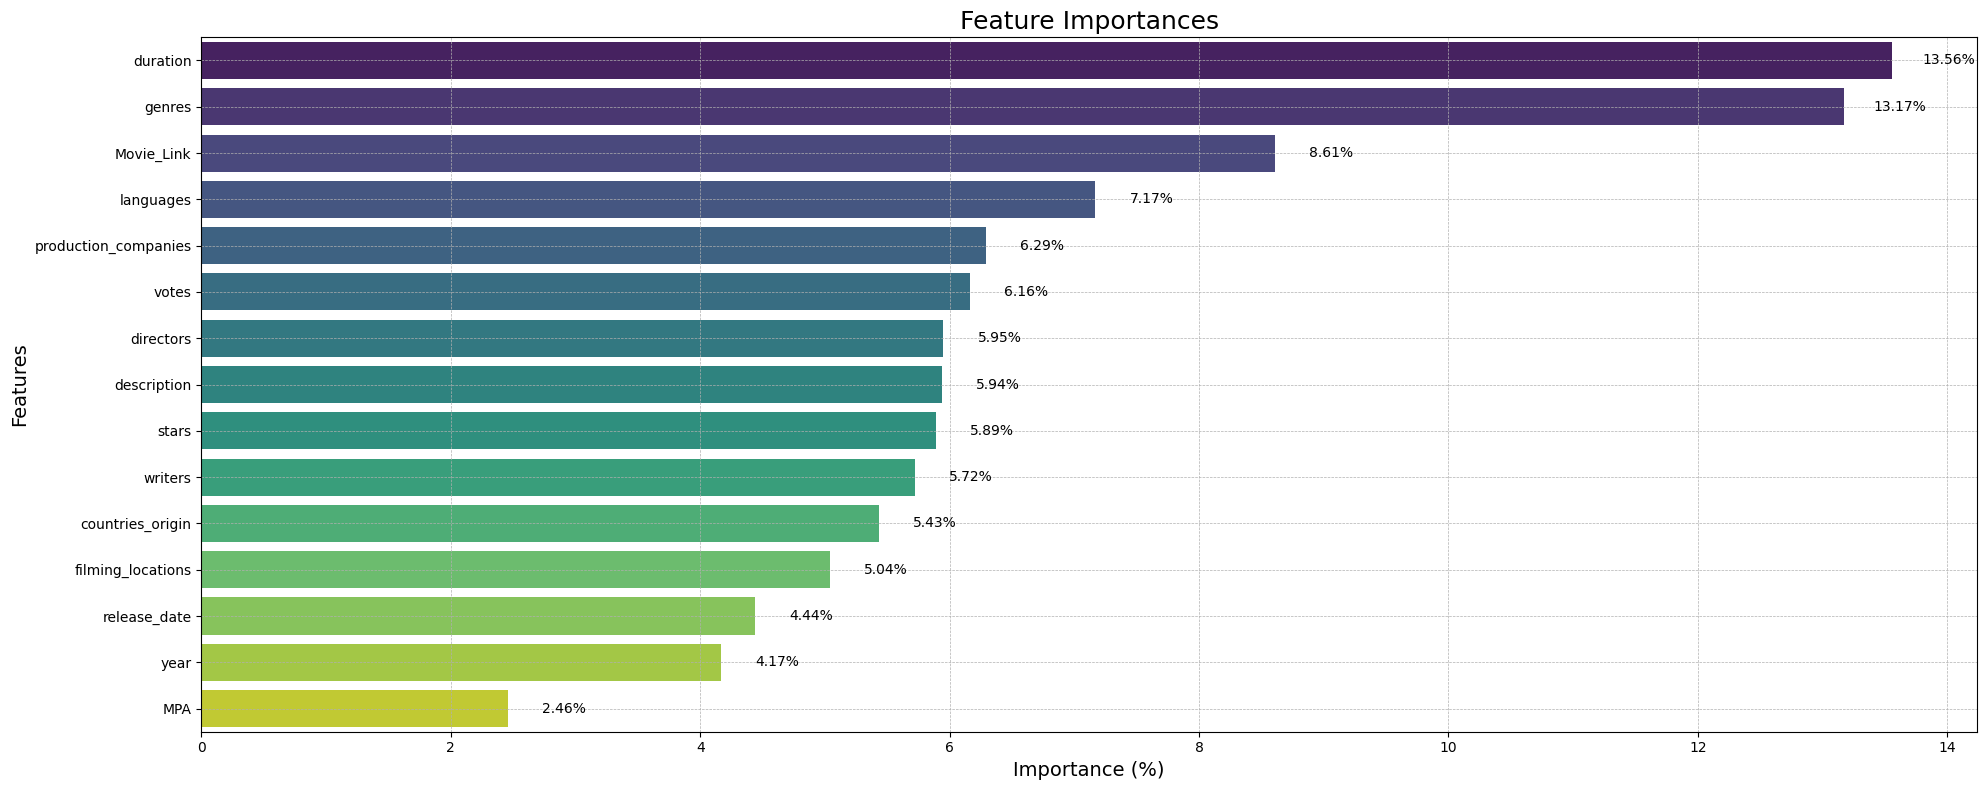

In [ ]:
# Plot feature importances
plt.figure(figsize=(20, 8))
# Sorting the features dataframe by 'Importance (%)' in descending order before plotting
features_sorted = features.sort_values(by='Importance (%)', ascending=False)
barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")
plt.title('Feature Importances', fontsize=18)
plt.xlabel('Importance (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for p in barplot.patches:
    barplot.annotate(f"{format(p.get_width(), '.2f')}%", (p.get_width() + 0.35, p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(9, 0), textcoords='offset points')
plt.tight_layout()
plt.show()